# Sanity check on lyric data
Just to make sure we're okay with our assumptions

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lyric_data = pd.read_csv("../data/HipHopLyrics.csv")
lyric_data.head()

,id,candidate,song,artist,sentiment,theme,album_release_date,line,url
0,1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...
1,2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics
2,3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics
3,4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics
4,5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics


In [5]:
lyric_data[['candidate', 'song', 'artist']].groupby('candidate').nunique()[['song', 'artist']]

,song,artist
candidate,,
Ben Carson,1,1
Bernie Sanders,2,2
Chris Christie,2,2
Donald Trump,266,192
Hillary Clinton,92,79
Jeb Bush,9,9
Mike Huckabee,2,2
Ted Cruz,1,1


In [6]:
# check for missing values
lyric_data.apply(lambda x : x.isnull().sum(), axis = 0)

id                     0
candidate              0
song                   0
artist                 0
sentiment              0
theme                 79
album_release_date     0
line                   0
url                    0
dtype: int64

In [14]:
lyric_data.theme.unique()

array([nan, 'political', 'personal', 'money', 'sexual', 'hotel',
       'The Apprentice', 'power'], dtype=object)

In [56]:
lyric_data[['candidate', 'theme', 'song']].groupby(['candidate', 'theme']).nunique()[['song']]

song
candidate       theme               
Bernie Sanders  political          2
Donald Trump    The Apprentice    17
                hotel             68
                money            102
                personal          15
                political         24
                power              2
                sexual             1
Hillary Clinton money              5
                personal          29
                political         21
                sexual             3
Jeb Bush        personal           3
                political          4
Ted Cruz        political          1

In [22]:
lyric_data.theme.isnull().sum()

79

In [24]:
lyric_data.artist.nunique()

262

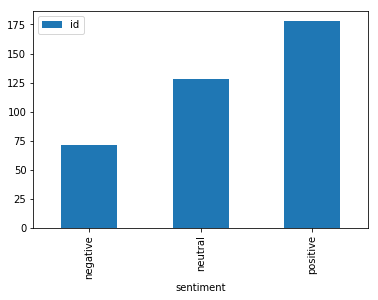

In [29]:
lyric_data[['id', 'sentiment']].groupby('sentiment').count().plot(kind = "bar")

In [31]:
lyric_data[['candidate', 'theme', 'song', 'sentiment']].groupby(['candidate', 'theme', 'sentiment']).count()

song
candidate       theme          sentiment      
Bernie Sanders  political      negative      1
                               positive      1
Donald Trump    The Apprentice neutral      18
                hotel          neutral       7
                               positive     61
                money          negative      1
                               neutral      14
                               positive     87
                personal       negative      5
                               neutral       5
                               positive      5
                political      negative     18
                               neutral       5
                               positive      1
                power          neutral       1
                               positive      1
                sexual         neutral       1
Hillary Clinton money          neutral       1
                               positive      4
                personal       negative      7
                               neutral      18
                               positive      4
                political      negative     13
                               neutral       5
                               positive      3
                sexual         negative      2
                               neutral       1
Jeb Bush        personal       negative      1
                               neutral       2
                political      negative      4
Ted Cruz        political      negative      1

In [33]:
lyric_data.shape

(377, 9)

In [37]:
lyric_data[['sentiment', 'line']][lyric_data.sentiment == "positive"].sample(3)

,sentiment,line
230,positive,"Stephen Curry Basedgod, Donald Trump Basedgod"
274,positive,In hot pursuit of Donald Trump rap loot
115,positive,It's like Trump in your crib countin' money wi...


In [52]:
lyric_data[['sentiment', 'line']][lyric_data.sentiment == "neutral"].sample(3)

,sentiment,line
117,neutral,Look at Donald Trump!
275,neutral,"Senseless, Apprentice I thought Da Don knew Tr..."
290,neutral,I'm at the poker table like I'm Donald Trump


In [54]:
lyric_data[['sentiment', 'line']][lyric_data.sentiment == "negative"].sample(3)

,sentiment,line
370,negative,"I fantasize shooting Trump down, A shot for ev..."
44,negative,"But Hilllary, I promise to wipe my server clea..."
348,negative,I want to buy Donald Trump and sell him to El ...
